In [1]:
%matplotlib inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from pathlib import Path

from sklearn.metrics import r2_score
import matplotlib.ticker as mticker
from lmfit.models import PowerLawModel

from mpl_toolkits.axes_grid1.inset_locator import inset_axes, zoomed_inset_axes, mark_inset

# Global plot parameters
plt.rcParams.update({'font.size':20, 'lines.markersize':9})
plt.rcParams.update({'mathtext.fontset':'cm'})
plt.rcParams.update({'font.family':'Times New Roman'})

In [2]:
data_location = Path(r'./motor_data_master.ods')

xlsx = pd.ExcelFile(data_location, engine='odf')

maxon_df = xlsx.parse(sheet_name='Maxon')
servo_df = xlsx.parse(sheet_name='Servos')
stepper_df = xlsx.parse(sheet_name='Stepper')

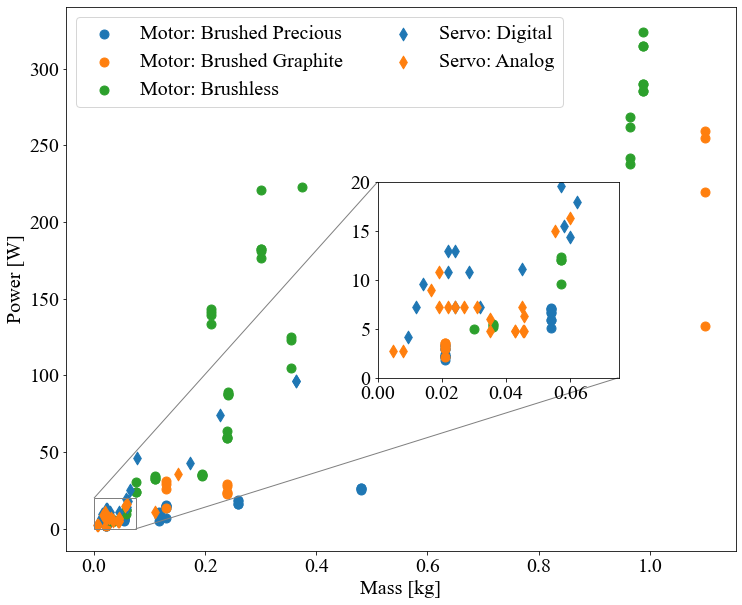

In [27]:
fig1, ax1 = plt.subplots(figsize=(12,10), facecolor='w')

axins = inset_axes(ax1, width="60%", height="60%",
                   bbox_to_anchor=(.45, .3, .6, .6),
                   bbox_transform=ax1.transAxes, loc=3)

motor_types = maxon_df['Type'].unique()
mapping = ['Brushed Precious', 'Brushed Graphite', 'Brushless']
colors = ['tab:blue', 'tab:orange', 'tab:green']

for i, case in enumerate(motor_types):
    df = maxon_df[maxon_df['Type']==case].copy()
    df.sort_values(by=['Weight [kg]'], inplace=True)
    power = np.multiply(df['Nominal Voltage [V]'].values, df['Nominal Current [A]'].values)
    #fit = np.poly1d(np.polyfit(df['weight [g]'], power, 1))
    ax1.scatter(df['Weight [kg]'], power, marker='o', color=colors[i], label='Motor: ' + mapping[i])
    #ax1.plot(df['weight [g]'], fit(df['weight [g]']), '--', color=colors[i], label=mapping[i] + ' fit')

    axins.scatter(df['Weight [kg]'], power, marker='o', color=colors[i], label='Motor: ' + mapping[i])

servo_types = servo_df['Circuit'].unique()
for i, case in enumerate(servo_types):
    df = servo_df[servo_df['Circuit']==case].copy()
    df.sort_values(by=['Weight [kg]'], inplace=True)
    power = np.multiply(df['Nominal Voltage [V]'].values, df['Nominal Current [A]'].values)
    #fit = np.poly1d(np.polyfit(df['weight [g]'], power, 1))
    ax1.scatter(df['Weight [kg]'], power, marker='d', color=colors[i], label='Servo: ' + case)
    #ax1.plot(df['weight [g]'], fit(df['weight [g]']), '--', color=colors[i], label=mapping[i] + ' fit')

    axins.scatter(df['Weight [kg]'], power, marker='d', color=colors[i], label='Servo: ' + case)

mark_inset(ax1, axins, loc1=2, loc2=4, fc="none", ec="0.5")
axins.set_xlim([0, 0.075])
axins.set_ylim([0, 20])

formatter = mticker.ScalarFormatter(useMathText=True, useOffset=False)
formatter.set_scientific(True)
# fix the number of ticks on the inset axes
axins.yaxis.get_major_locator().set_params(nbins=4)
axins.xaxis.get_major_locator().set_params(nbins=4)
#axins.ticklabel_format(axis='x', style='sci', scilimits=(0,0))

# ax1.set_xscale('log')
# ax1.set_yscale('log')
ax1.set_xlabel('Mass [kg]')
ax1.set_ylabel('Power [W]')
ax1.legend(ncol=2)

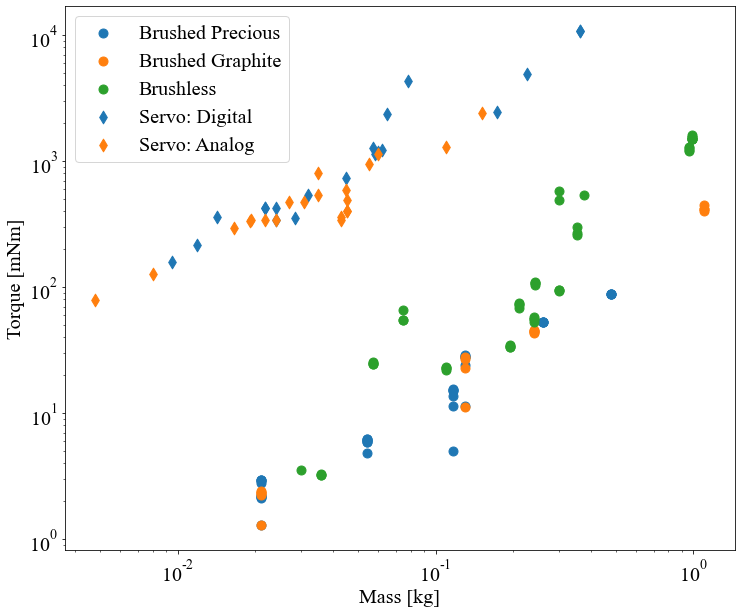

In [25]:
fig2, ax2 = plt.subplots(figsize=(12,10), facecolor='w')
types = maxon_df['Type'].unique()
mapping = ['Brushed Precious', 'Brushed Graphite', 'Brushless']
colors = ['tab:blue', 'tab:orange', 'tab:green']

for i, case in enumerate(types):
    df = maxon_df[maxon_df['Type']==case].copy()
    df.sort_values(by=['Weight [kg]'], inplace=True)
    #fit = np.poly1d(np.polyfit(df['weight [g]'], df['Nominal Torque [mNm]'], 1))
    ax2.scatter(df['Weight [kg]'], df['Nominal Torque [mNm]'], marker='o', color=colors[i], label=mapping[i])
    #ax2.plot(df['weight [g]'], fit(df['weight [g]']), '--', color=colors[i], label=mapping[i] + ' fit')

servo_types = servo_df['Circuit'].unique()
for i, case in enumerate(servo_types):
    df = servo_df[servo_df['Circuit']==case].copy()
    df.sort_values(by=['Weight [kg]'], inplace=True)
    #fit = np.poly1d(np.polyfit(df['weight [g]'], power, 1))
    ax2.scatter(df['Weight [kg]'], df['Torque [mNm]'], marker='d', color=colors[i], label='Servo: ' + case)
    #ax1.plot(df['weight [g]'], fit(df['weight [g]']), '--', color=colors[i], label=mapping[i] + ' fit')

    #axins.scatter(df['Weight [kg]'], power, marker='d', color=colors[i], label='Servo: ' + case)

ax2.set_xlabel('Mass [kg]')
ax2.set_ylabel('Torque [mNm]')
ax2.set_yscale('log')
ax2.set_xscale('log')
ax2.legend(ncol=1)

In [ ]:
fig3, ax3 = plt.subplots(figsize=(12,10), facecolor='w')
types = maxon_df['Type'].unique()
mapping = ['Brushed Precious', 'Brushed Graphite', 'Brushless']
colors = ['tab:blue', 'tab:orange', 'tab:green']

for i, case in enumerate(types):
    df = maxon_df[maxon_df['Type']==case].copy()
    df.sort_values(by=['Price [NZD]'], inplace=True)
    #fit = np.poly1d(np.polyfit(df['Price [NZD]'], df['Nominal Torque [mNm]'], 1))
    ax3.scatter(df['Price [NZD]'], df['Nominal Torque [mNm]'], color=colors[i], label=mapping[i])
    #ax3.plot(df['Price [NZD]'], fit(df['Price [NZD]']), '--', color=colors[i], label=mapping[i] + ' fit')

ax3.set_xlabel('Price [NZD]')
ax3.set_ylabel('Nominal Torque [mNm]')
#ax3.set_yscale('log')
#ax3.set_xscale('log')
ax3.legend()